Lab 2 Question 5

github repository: https://github.com/spsoofbaf/UNB_ComputerVision

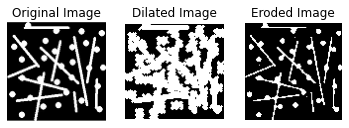

In [1]:
import numpy as np
from skimage import img_as_ubyte
from PIL import Image
import matplotlib.pyplot as plt

points_image = img_as_ubyte(Image.open("points.png"))


def get_value(binary_image, x, y):
    columns = binary_image.shape[0]
    rows = binary_image.shape[1]

    if x == columns or y == rows or x < 0 or y < 0:
        return 0
    else:
        return binary_image[x][y]


def dilate_b4(binary_image):
    columns = binary_image.shape[0]
    rows = binary_image.shape[1]
    dilated_array = np.zeros(binary_image.shape, dtype=bool)

    for x in range(columns):
        for y in range(rows):
            f1 = np.logical_or(
                get_value(binary_image, x, y),
                get_value(binary_image, x - 1, y))

            f2 = np.logical_or(
                get_value(binary_image, x + 1, y),
                get_value(binary_image, x, y - 1))

            f3 = np.logical_or(f1, f2)
            dilated_array[x][y] = np.logical_or(f3, get_value(binary_image, x, y + 1))

    return dilated_array


def erode_b4(binary_image):
    columns = binary_image.shape[0]
    rows = binary_image.shape[1]
    eroded_array = np.zeros(binary_image.shape, dtype=bool)

    for x in range(columns):
        for y in range(rows):
            f1 = np.logical_and(
                get_value(binary_image, x, y),
                get_value(binary_image, x - 1, y))

            f2 = np.logical_and(
                get_value(binary_image, x + 1, y),
                get_value(binary_image, x, y - 1))

            f3 = np.logical_and(f1, f2)
            eroded_array[x][y] = np.logical_and(f3, get_value(binary_image, x, y + 1))

    return eroded_array


original_image = Image.fromarray(points_image)

dilated_image = Image.fromarray(img_as_ubyte(dilate_b4(points_image)))

eroded_image = Image.fromarray(img_as_ubyte(erode_b4(points_image)))

# Plotting the result
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(original_image, cmap="gray")
ax[0].axis('off')
ax[0].title.set_text('Original Image')

ax[1].imshow(dilated_image, cmap="gray")
ax[1].axis('off')
ax[1].title.set_text('Dilated Image')

ax[2].imshow(eroded_image, cmap="gray")
ax[2].axis('off')
ax[2].title.set_text('Eroded Image')

plt.show()
